## Project on prediction of the rise and fall in demand of Automatic and Manual cars resulting to changes in price over the years.
Using two models in our test to check which of the model perform better.
* Support Vector Machine model.
* KNearest Neighbor model.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Patiencenne\Desktop\Project portfolio datasets\archive (2)\Car details v3.csv')

In [5]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [6]:
df = df.drop(['name', 'seller_type', 'owner'], axis = 1)

In [7]:
df.head(2)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   mileage        7907 non-null   object 
 6   engine         7907 non-null   object 
 7   max_power      7913 non-null   object 
 8   torque         7906 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


In [9]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Explanatory Data analysis (EDA)

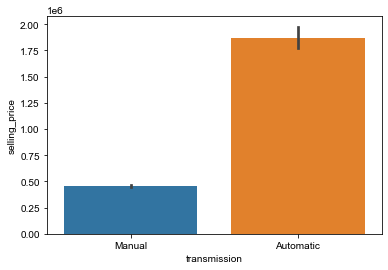

In [10]:
sns.barplot(x = 'transmission', y = 'selling_price', data = df)
sns.set_style('darkgrid')

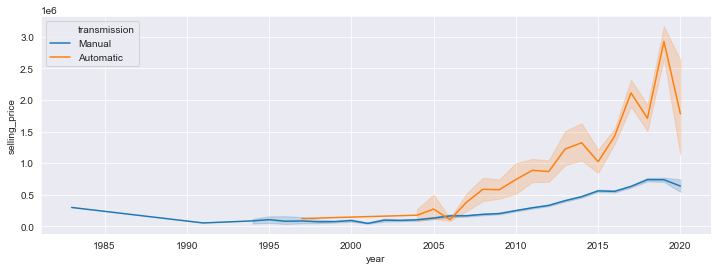

In [12]:
plt.figure(figsize = (12, 4))
sns.lineplot(x = 'year', y = 'selling_price', hue = 'transmission', data = df)

## Data Cleaning

In [13]:
df.mileage = df.mileage.str.split(' ', expand = True)[0].astype(float)

In [14]:
df.engine = df.engine.str.split(' ', expand = True)[0].astype(float)

In [15]:
df.max_power = df.max_power.str.split(' ', expand = True)[0]

In [16]:
df.max_power = pd.to_numeric(df.max_power)

In [17]:
def clean_value(value):
    if value == np.nan:
        return 0
    res  = 0
    match = re.match(r'^(\d+\.?\d+).*$', str(value))
    if match is not None:
        res  = np.float64(match[1])
    return res

In [18]:
df.torque = df.torque.map(clean_value)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   mileage        7907 non-null   float64
 6   engine         7907 non-null   float64
 7   max_power      7912 non-null   float64
 8   torque         8128 non-null   float64
 9   seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 635.1+ KB


In [20]:
Fuel = pd.get_dummies(df.fuel)

In [21]:
Fuel.head()

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [22]:
Year = pd.get_dummies(df.year)

In [23]:
Year.head(2)

,1983,1991,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df = pd.concat([df, Fuel, Year], axis = 1)

In [25]:
df.head(2)

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,2014,450000,145500,Diesel,Manual,23.40,1248.0,74.00,190.0,5.0,...,0,0,0,1,0,0,0,0,0,0
1,2014,370000,120000,Diesel,Manual,21.14,1498.0,103.52,250.0,5.0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df = df.drop(['year', 'fuel'], axis = 1)

In [27]:
df.head(2)

,selling_price,km_driven,transmission,mileage,engine,max_power,torque,seats,CNG,Diesel,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,450000,145500,Manual,23.40,1248.0,74.00,190.0,5.0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,370000,120000,Manual,21.14,1498.0,103.52,250.0,5.0,0,1,...,0,0,0,1,0,0,0,0,0,0


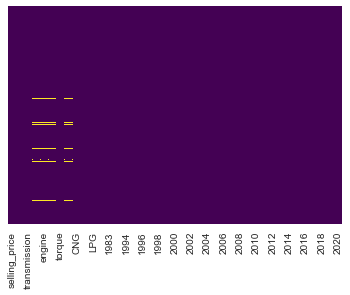

In [28]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [29]:
df.isnull().sum().head(9)

selling_price      0
km_driven          0
transmission       0
mileage          221
engine           221
max_power        216
torque             0
seats            221
CNG                0
dtype: int64

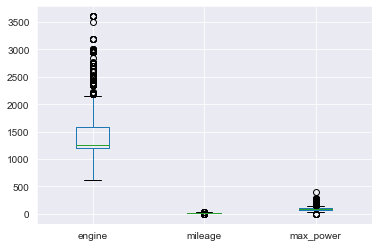

In [30]:
df[['engine', 'mileage', 'max_power']].plot.box()

In [31]:
df.mileage.fillna(value = np.round(df.mileage.mean(), decimals = 2), inplace = True)

In [32]:
df.engine.fillna(value = np.round(df.engine.median(), decimals = 2), inplace = True)

In [33]:
df.max_power.fillna(value = np.round(df.max_power.median(), decimals = 2), inplace = True)

In [34]:
df.seats.fillna(method = 'ffill', inplace = True)

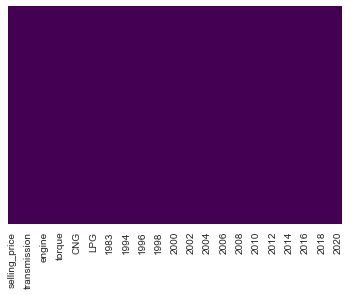

In [35]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Normalizing the df data with StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()

In [38]:
df1 = scale.fit_transform(df.drop('transmission', axis = 1))

## Using Principal Component Analysis (PCA) to reduce the dimension of the df data after using StandardScaler to normalized it to df1 data.

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components= 21)

In [41]:
x_pca = pca.fit_transform(df1)

In [42]:
X = x_pca
y = df.transmission

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()

In [47]:
svc.fit(X_train, y_train)

SVC()

## Prediction

In [48]:
pred = svc.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print('Accuracy_score: ',accuracy_score(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Accuracy_score:  0.9192291922919229


[[ 139  185]
 [  12 2103]]


              precision    recall  f1-score   support

   Automatic       0.92      0.43      0.59       324
      Manual       0.92      0.99      0.96      2115

    accuracy                           0.92      2439
   macro avg       0.92      0.71      0.77      2439
weighted avg       0.92      0.92      0.91      2439



In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=17)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [54]:
prediction = knn.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
print('Accuracy_score: ', accuracy_score(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

Accuracy_score:  0.933169331693317


[[ 178  146]
 [  17 2098]]


              precision    recall  f1-score   support

   Automatic       0.91      0.55      0.69       324
      Manual       0.93      0.99      0.96      2115

    accuracy                           0.93      2439
   macro avg       0.92      0.77      0.82      2439
weighted avg       0.93      0.93      0.93      2439



## In conclusion
The two models performed well, indicating the fall in the demand for Manual cars and rise in the demand for Automatic cars over the years.